# Google Trends

Google Trends é uma ferramenta do Google que mostra os mais populares termos buscados em um passado recente.

## Relatório de comparação de tendências

In [1]:
%%capture --no-display
import math
from pickletools import uint8
from pytrends.request import TrendReq
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Markdown, display
def plotComparison(dataFrame:DataFrame, cols:uint8, showValues=False, Incerteza=False, ylin=[]):
    plt.figure(figsize=(20,5))
    Patch = []
    if (len(ylin)>0):
        plt.axes().set_ylim(ylin)
    for col in dataFrame.columns[0:cols]:
        color = 'red' if col == dataFrame.columns[0] else 'blue' if col == dataFrame.columns[1] else 'orange'
        Patch.append(mpatches.Patch(color=color, label=col))
        if Incerteza:
            for i in range(len(dataFrame[col])):
                plt.plot(dataFrame[col][i:i+2], label=col, color=color, linewidth=dataFrame['Incerteza'][i]*2, alpha=0.05)
        else:
            plt.plot(dataFrame[col], label=col, color=color)
    plt.legend(handles=Patch)
    if showValues:
        for index, row in dataFrame.iterrows():
            if index.minute == 0 and index.hour == 0 and index.second == 0:
                for col in dataFrame.columns[0:cols]:
                    plt.text(index, row[col], "{:.1f}".format(row[col]))
                


# Palavras-chave
kw_list = ['lula', 'bolsonaro', 'lula bolsonaro']
conn = TrendReq(hl='pt-BR', tz=360, requests_args={'verify':False}) # Conexão com o Google Trends
req = conn.get_historical_interest(kw_list, year_start=2022, month_start=10, day_start=3, hour_start=0, year_end=2022, month_end=10, day_end=30, hour_end=0, geo='BR', gprop='')


### Dados Lidos do Google Trends

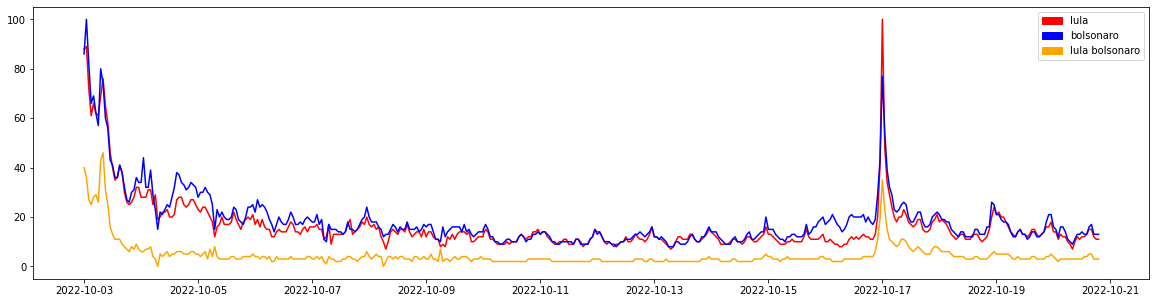

In [2]:
plotComparison(req, 3)

### Acumulado, crescimento em escala de log

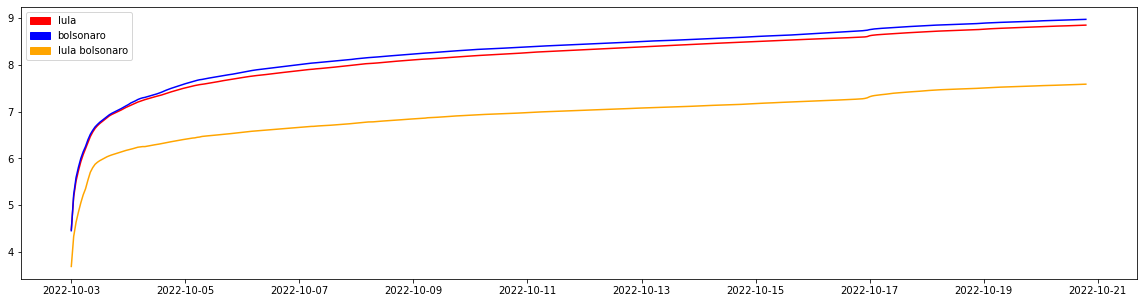

In [3]:
accum = []
idArr = []

for index,row in req.iterrows():
    total = (math.fsum(row[v] for v in kw_list[0:2]))
    if len(idArr) == 0 or index != idArr[-1]:
        accum.append({})
        idArr.append(index)
        for col in kw_list:
            accum[-1][col] = row[col] + accum[-2][col] if len(accum)>1 else row[col]
dataFrame = DataFrame(accum,index=idArr)
for col in dataFrame.columns[0:len(kw_list)]:
    dataFrame[col] = dataFrame[col].apply(lambda x: math.log(x))
plotComparison(dataFrame, 3)


### Embate percentual com incerteza


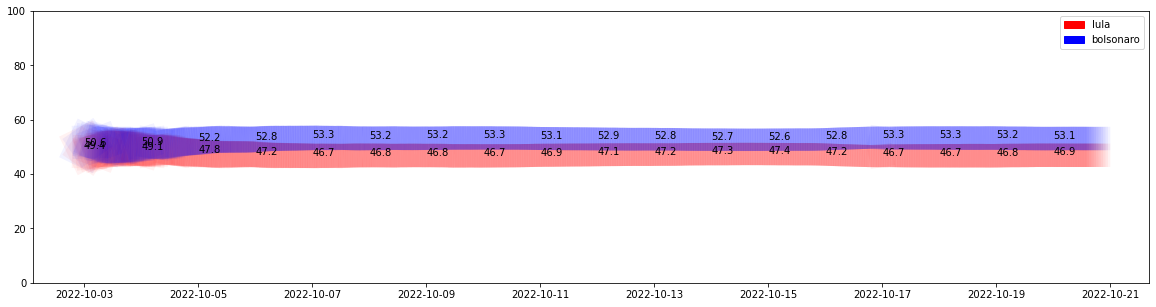

In [4]:
accumPercent = []
for x in accum:
    accumPercent.append({})
    total = (math.fsum(x[v] for v in kw_list[0:2]))
    for col in kw_list[0:2]:
        accumPercent[-1][col] = (x[col]/total)*100
    accumPercent[-1]["Incerteza"] = x[kw_list[2]] / (x[kw_list[2]]+total) * 100
dataFrame = DataFrame(accumPercent,index=idArr)
plotComparison(dataFrame, 2, True, True , ylin=[0,100])

## Por região

In [5]:
%%capture --no-display
dataByRegion = conn.interest_by_region(resolution='COUNTRY')
display(dataByRegion)

,lula,bolsonaro,lula bolsonaro
geoName,,,
Acre,41,44,15
Alagoas,40,46,14
Amapá,43,44,13
Amazonas,44,44,12
Bahia,43,42,15
Ceará,42,45,13
Distrito Federal,44,46,10
Espírito Santo,43,42,15
Goiás,41,45,14


## Principais Tópicos

In [6]:
%%capture --no-display
display(conn.related_queries())

{'lula': {'top':                                 query  value
  0                           bolsonaro    100
  1                      lula bolsonaro    100
  2                    bolsonaro e lula     45
  3                         lula debate     32
  4                       lula pesquisa     27
  5                        governo lula     26
  6               debate lula bolsonaro     22
  7             pesquisa lula bolsonaro     22
  8                   desmatamento lula     21
  9                        desmatamento     21
  10            debate lula e bolsonaro     18
  11                  lula ou bolsonaro     17
  12                    lula presidente     16
  13                          lula 2022     15
  14          desmatamento governo lula     13
  15                          flow lula     13
  16          pesquisa bolsonaro e lula     11
  17                          lula hoje     10
  18             desmatamento bolsonaro      7
  19         debate de lula e bolsonaro      